In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tqdm.notebook import tqdm, trange

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Household Power Prediction/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
df.shape

(2075259, 7)

In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [11]:
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [12]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

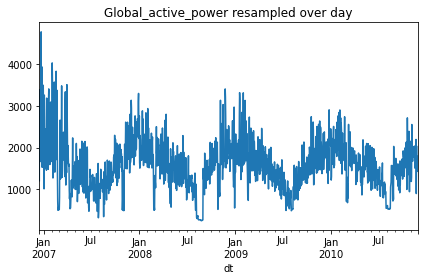

<Figure size 1440x576 with 0 Axes>

In [75]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.figure(figsize=(20,8))
plt.show()   

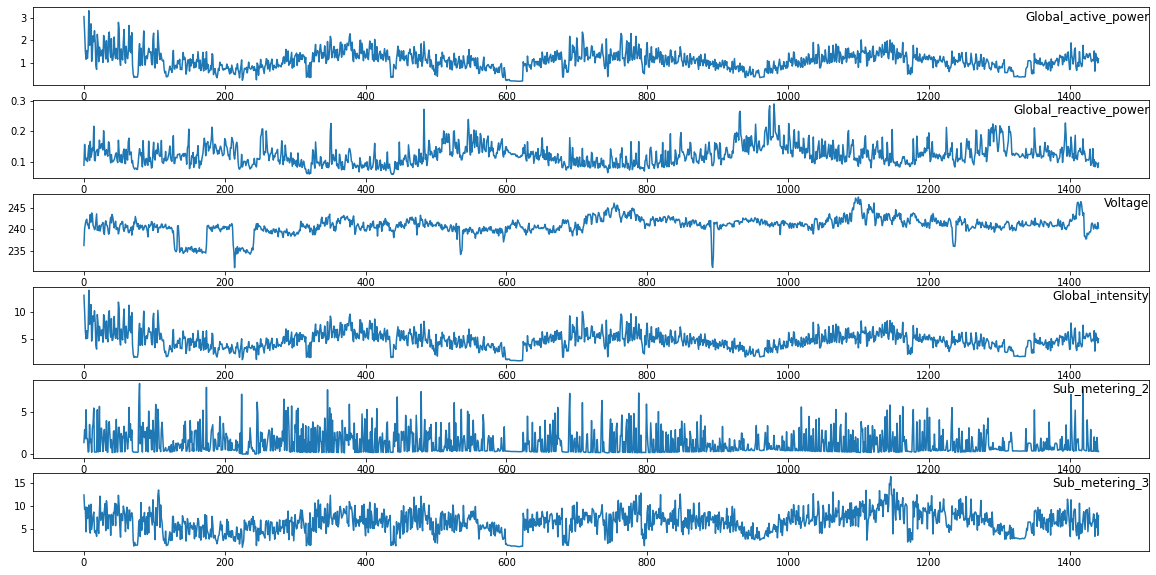

In [73]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(20, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

In [15]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [19]:
start_test = '2010-01-01'
train, test = df_resample.loc[:start_test], df_resample.loc[start_test:]

In [20]:
print(train.shape)
print(test.shape)

(26695, 7)
(7918, 7)


In [21]:
SCALER = MinMaxScaler(feature_range=(0,1))

scaler = SCALER.fit(df.to_numpy())

train_scaled = scaler.transform(train.to_numpy())
test_scaled = scaler.transform(test.to_numpy())

In [22]:
def prepare_dataset(data, window_size):
    X, Y = np.empty((0,window_size)), np.empty((0))
    for i in range(len(data)-window_size-1):
        X = np.vstack([X,data[i:(i + window_size),0]])
        Y = np.append(Y,data[i + window_size,0])   
    X = np.reshape(X,(len(X),window_size,1))
    Y = np.reshape(Y,(len(Y),1))
    return X, Y

In [23]:
best_window_size = 24

In [24]:
#create x_train, y_train, X_test,y_test
X_train, y_train = prepare_dataset(train_scaled,best_window_size)
X_test, y_test = prepare_dataset(test_scaled,best_window_size)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26670, 24, 1)
(26670, 1)
(7893, 24, 1)
(7893, 1)


In [44]:
# inputs = Input(shape=(best_window_size,1))
# x = LSTM(100, input_shape=(best_window_size,1))(inputs)
# predictions = Dense(1, activation='linear')(x)
# model = Model(inputs = inputs, outputs = predictions)
# model.compile(optimizer='adam',loss='mean_squared_error')
# history = model.fit(X_train, y_train, epochs=10, batch_size=10,validation_data=(X_test, y_test),shuffle=True)
# y_pred = model.predict(X_test)
model = Sequential()
model.add(LSTM(100, input_shape=(best_window_size,1)))
model.add(Dropout(0.5))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(X_train, y_train, epochs=10, batch_size=70,validation_data=(X_test, y_test),shuffle=True)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', rmse)

Epoch 1/10
381/381 [==============================] - 8s 12ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 2/10
381/381 [==============================] - 4s 10ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 3/10
381/381 [==============================] - 4s 10ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 4/10
381/381 [==============================] - 4s 10ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 5/10
381/381 [==============================] - 4s 10ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 6/10
381/381 [==============================] - 4s 10ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 7/10
381/381 [==============================] - 4s 11ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 8/10
381/381 [==============================] - 4s 11ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 9/10
381/381 [==============================] - 4s 10ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 10/10
381/381 [==============================] - 4s 10ms/step - loss: 0.0031 - val_lo

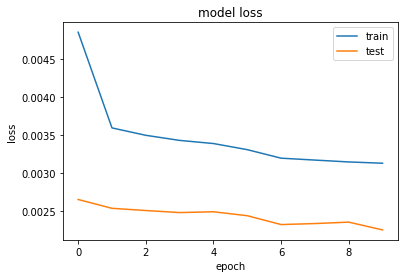

In [45]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [62]:
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 24))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.524


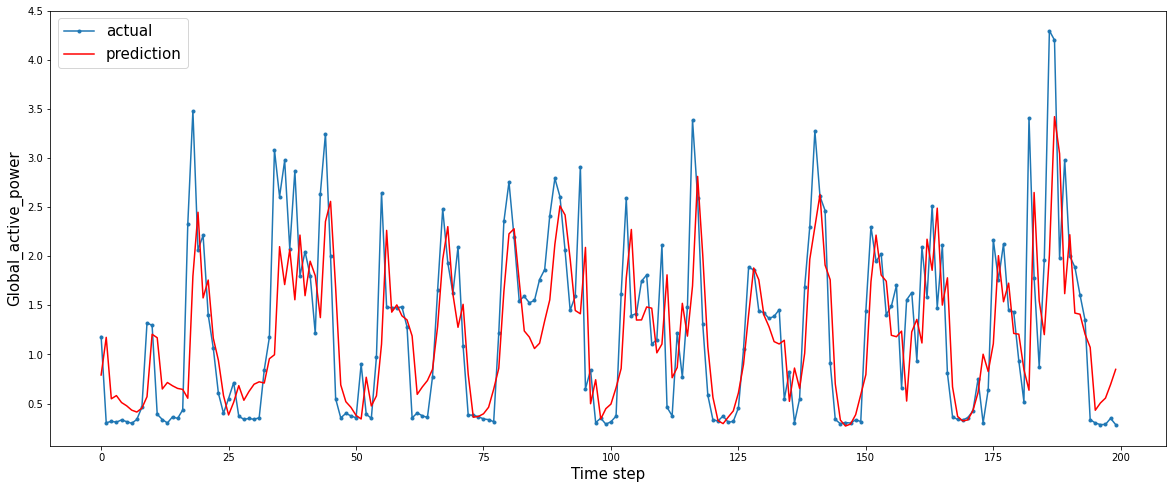

In [71]:
aa=[x for x in range(200)]
plt.figure(figsize=(20,8))
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()